Zachary OBrien - CSCE 5215 - HW2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

%matplotlib inline


Setup data

In [ ]:
digits = datasets.load_digits()

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# X_train, X_test, y_train, y_test = train_test_split(
#     data, digits.target, stratify=True, test_size=0.20)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.20)

outcomes = {}
train_scores = {}

Default SVC - Scores at bottom

In [ ]:
svc_clf = svm.SVC()
svc_clf.fit(X_train, y_train)
outcomes["default_svc"] = svc_clf.predict(X_test)

Default KNN - Scores at bottom

In [ ]:
k_clf = KNeighborsClassifier()
k_clf.fit(X_train, y_train)
outcomes["default_k"] = k_clf.predict(X_test)

Default Decision Tree - Scores at bottom

In [ ]:
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train , y_train)
outcomes["default_dtree"] = dtree_clf.predict(X_test)

Default Logistic Regression - Scores at bottom

In [ ]:
log_clf = LogisticRegression(max_iter=10000, solver='liblinear')
log_clf.fit(X_train, y_train)
outcomes["default_log"] = log_clf.predict(X_test)

Default for GridSearchCV is 5 fold cross-validation

SVC w/ Cross Validation

In [ ]:
c_range = [10**x for x in range(-5, 5)]
gamma_range = [10**x for x in range(-5, 5)]
svc_parameters = {'C': c_range, 'gamma': gamma_range, 'kernel': ['rbf']}
svc_cross = GridSearchCV(svc_clf, svc_parameters)
svc_cross.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",svc_cross.best_params_)
print("accuracy :",svc_cross.best_score_)
train_scores['svc_search'] = svc_cross.best_score_
outcomes['svc_tuned'] = svc_cross.predict(X_test)

tuned hpyerparameters :(best parameters)  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
accuracy : 0.9902584204413472


KNN w/ Cross Validation

In [ ]:
k_parameters = {'n_neighbors': [1,3,5,7,9]}
k_cross = GridSearchCV(k_clf, k_parameters)
k_cross.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",k_cross.best_params_)
print("accuracy :",k_cross.best_score_)
train_scores['k_search'] = k_cross.best_score_
outcomes['k_tuned'] = k_cross.predict(X_test)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 3}
accuracy : 0.9860796554394116


Decision Tree w/ Cross Validation

In [ ]:
dtree_parameters = {'min_samples_split': [3,5,7,9]}
dtree_cross = GridSearchCV(dtree_clf, dtree_parameters)
dtree_cross.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",dtree_cross.best_params_)
print("accuracy :",dtree_cross.best_score_)
train_scores['dtree_search'] = dtree_cross.best_score_
outcomes['dtree_tuned'] = dtree_cross.predict(X_test)

tuned hpyerparameters :(best parameters)  {'min_samples_split': 5}
accuracy : 0.8475827526132405


Linear Regression w/ Cross Validation

In [ ]:
c_range = [10**x for x in range(-5, 5)]
log_parameters = {"C":c_range, "penalty":["l1"]}
log_cross = GridSearchCV(log_clf, log_parameters)
log_cross.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",log_cross.best_params_)
print("accuracy :",log_cross.best_score_)
train_scores['log_search'] = log_cross.best_score_
outcomes['log_tuned'] = log_cross.predict(X_test)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.9630976577622918


Function to more easily plot confusion matricies

In [ ]:
# from https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(y_true, y_pred, cm, classes=None,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Only use the labels that appear in the data
    if classes:
        classes = classes[unique_labels(y_true, y_pred)]
    else:
        classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     print("Normalized confusion matrix")
    # else:
    #     print('Confusion matrix, without normalization')
    print(title, "Confusion Matrix")
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Fetch the scores - Data in more readable table below

In [ ]:
for key in train_scores.keys():
    print("Score for", key, "is", round(train_scores[key]*100, 3), "%")
for key in outcomes.keys():
    cm = confusion_matrix(y_test, outcomes[key])
    #plot_confusion_matrix(y_test, outcomes[key], cm=cm, title="{}".format(key))
    correct = 0
    incorrect = 0
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            if i == j:
                correct += cm[i][j]
            else:
                incorrect += cm[i][j]
    print("score for {}".format(key), round((correct / (correct + incorrect)) * 100, 3), "% accurate")

Score for svc_search is 99.026 %
Score for k_search is 98.608 %
Score for dtree_search is 84.758 %
Score for log_search is 96.31 %
score for default_svc 98.611 % accurate
score for default_k 99.167 % accurate
score for default_dtree 83.611 % accurate
score for default_log 96.111 % accurate
score for svc_tuned 98.889 % accurate
score for k_tuned 98.889 % accurate
score for dtree_tuned 84.444 % accurate
score for log_tuned 95.833 % accurate


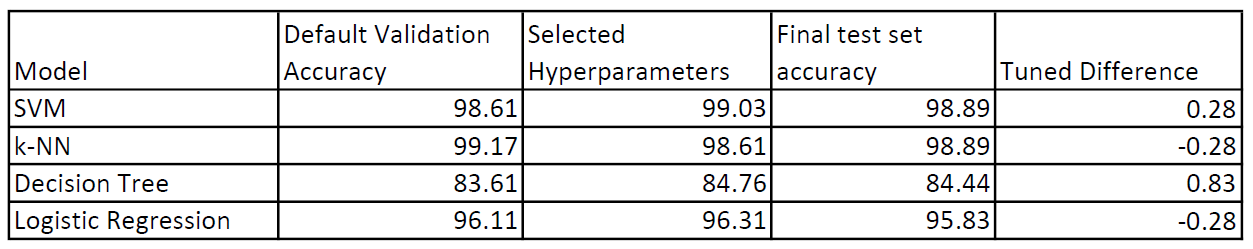
<br>
<br>
<br>
<br>
<br>

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert --to PDF "CSCE5215_HW2.ipynb"


**FINAL RESULTS** (unformatted)


---


Model: **SVM**
<br>Default Validation Accuracy: 98.61%
<br>Tuned Validation Accuracy: 96.03%
<br>Selected Hyperparameters: C = 1, Gamma = 0.001
<br>Final Test Set Accuracy: 98.89%

---

Model: **k-NN**
<br>Default Validation Accuracy: 99.17%
<br>Tuned Validation Accuracy: 98.61%
<br>Selected Hyperparameters: K = 3
<br>Final Test Set Accuracy: 98.89%

---

Model: **Decision Trees**
<br>Default Validation Accuracy: 83.61%
<br>Tuned Validation Accuracy: min_samples_split = 5
<br>Selected Hyperparameters: 84.76%
<br>Final Test Set Accuracy: 84.44%

---

Model: **Logistic Regression**
<br>Default Validation Accuracy: 96.11%
<br>Tuned Validation Accuracy: 96.31%
<br>Selected Hyperparameters: C = 0.1
<br>Final Test Set Accuracy: 95.83%